In [1]:
import pandas as pd
import numpy as np

c:\Users\akimp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\akimp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\akimp\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
nn = pd.read_csv('datas/NN_places.csv')
ekb = pd.read_csv('datas/EKB_places.csv')
vlad = pd.read_csv('datas/Vladimir_places.csv')
yarik = pd.read_csv('datas/yaroslavl_places.csv')
categories_nn = []
categories_ekb = []
categories_vlad = []
categories_yarik = []
for kind in nn['Kind']:
    categories_nn += kind.split(',')
for kind in ekb['Kind']:
    categories_ekb += kind.split(',')
for kind in vlad['Kind']:
    categories_vlad += kind.split(',')
for kind in yarik['Kind']:
    categories_yarik += kind.split(',')



In [3]:
categories_all = [['Нижний новгород', categories_nn], ['Екатеринбург', categories_ekb], ['Владимир', categories_vlad], ['Ярославль', categories_yarik]]
count_cat = []
count = 0
for city in categories_all:
    count_cat.append([city[0]])
    data = {}
    for category in set(city[1]):
        data[category] = city[1].count(category)
    count_cat[count].append(data)
    count += 1

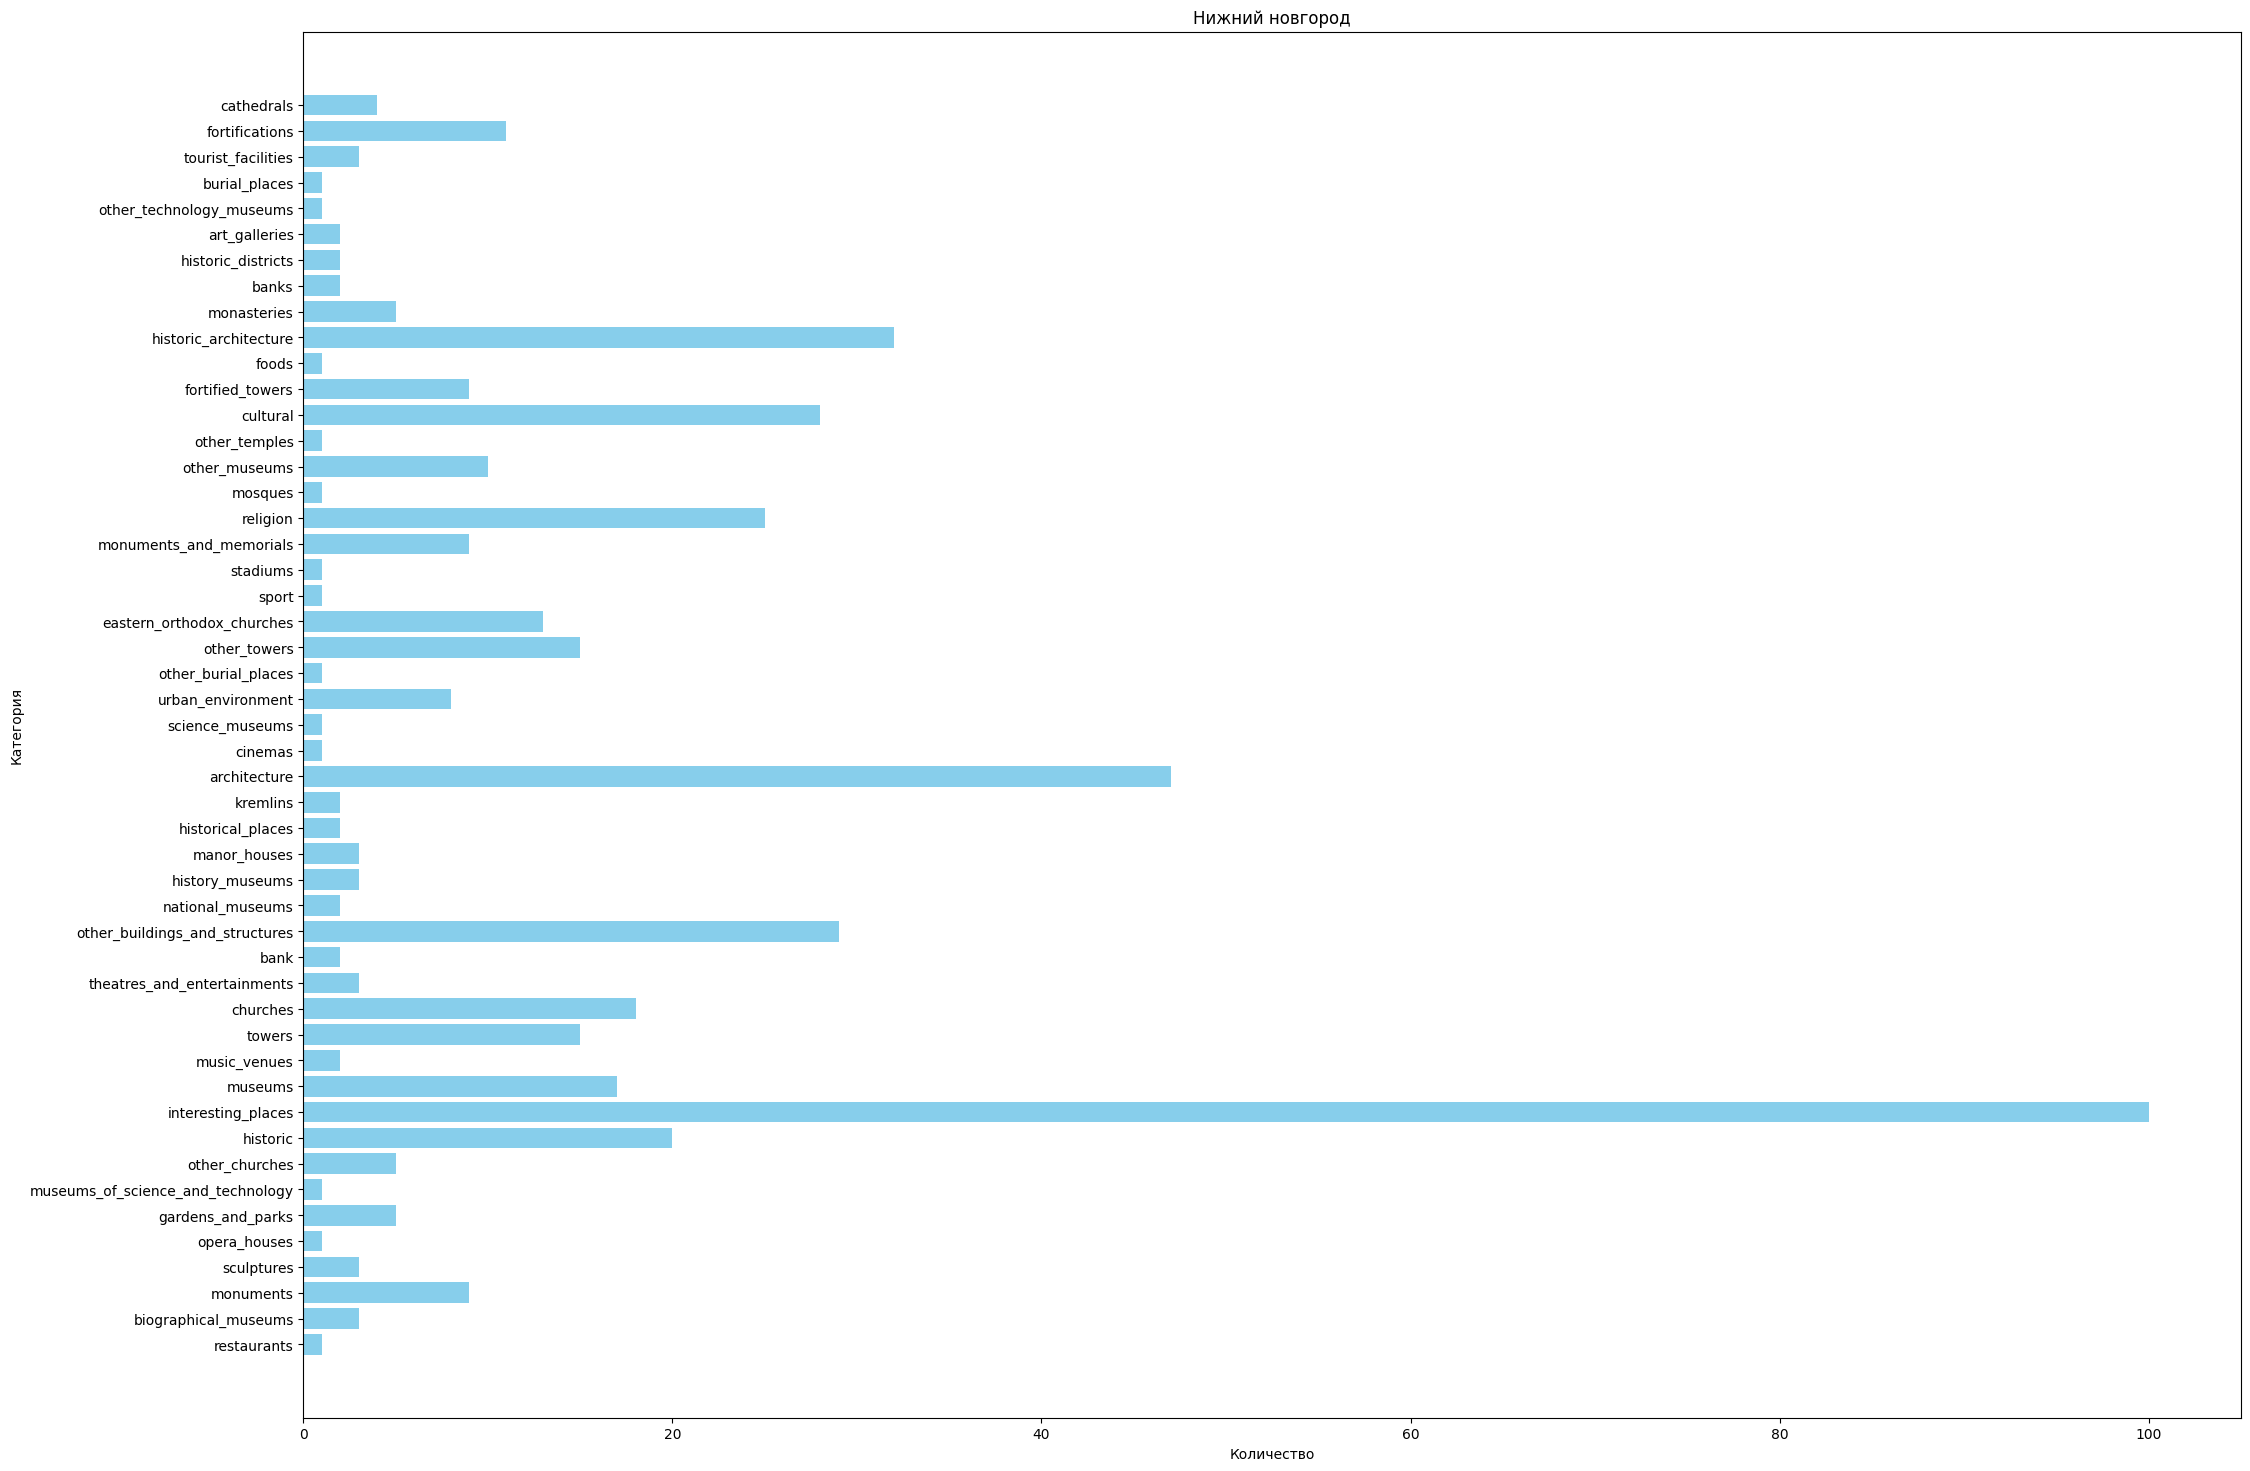

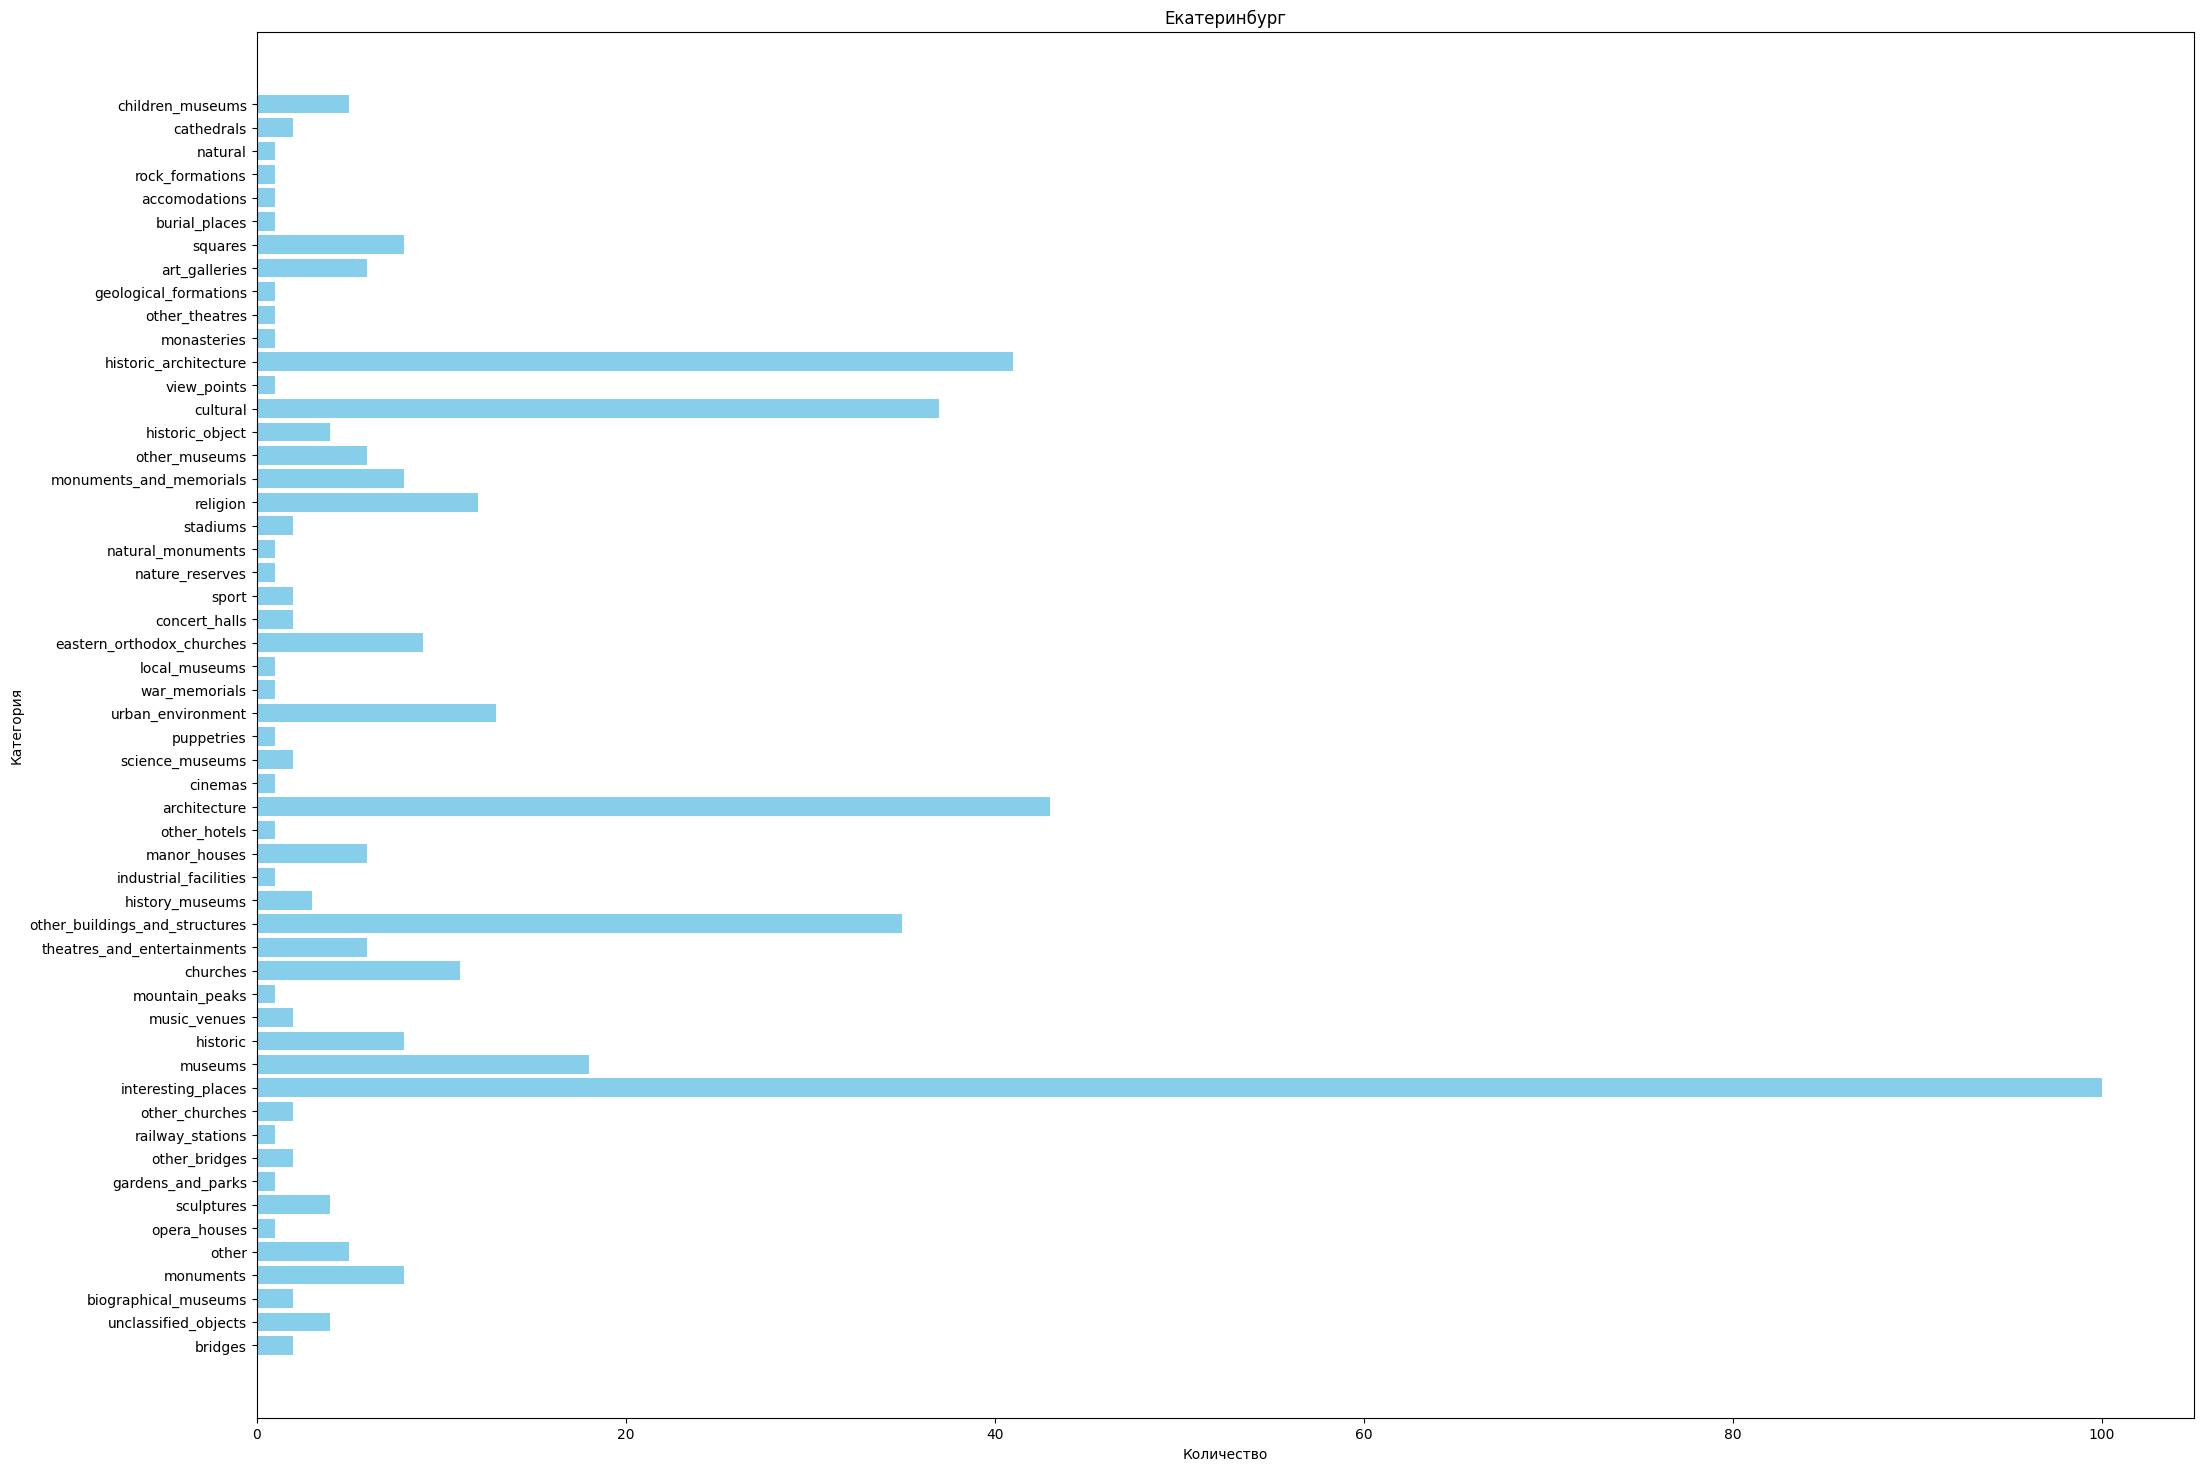

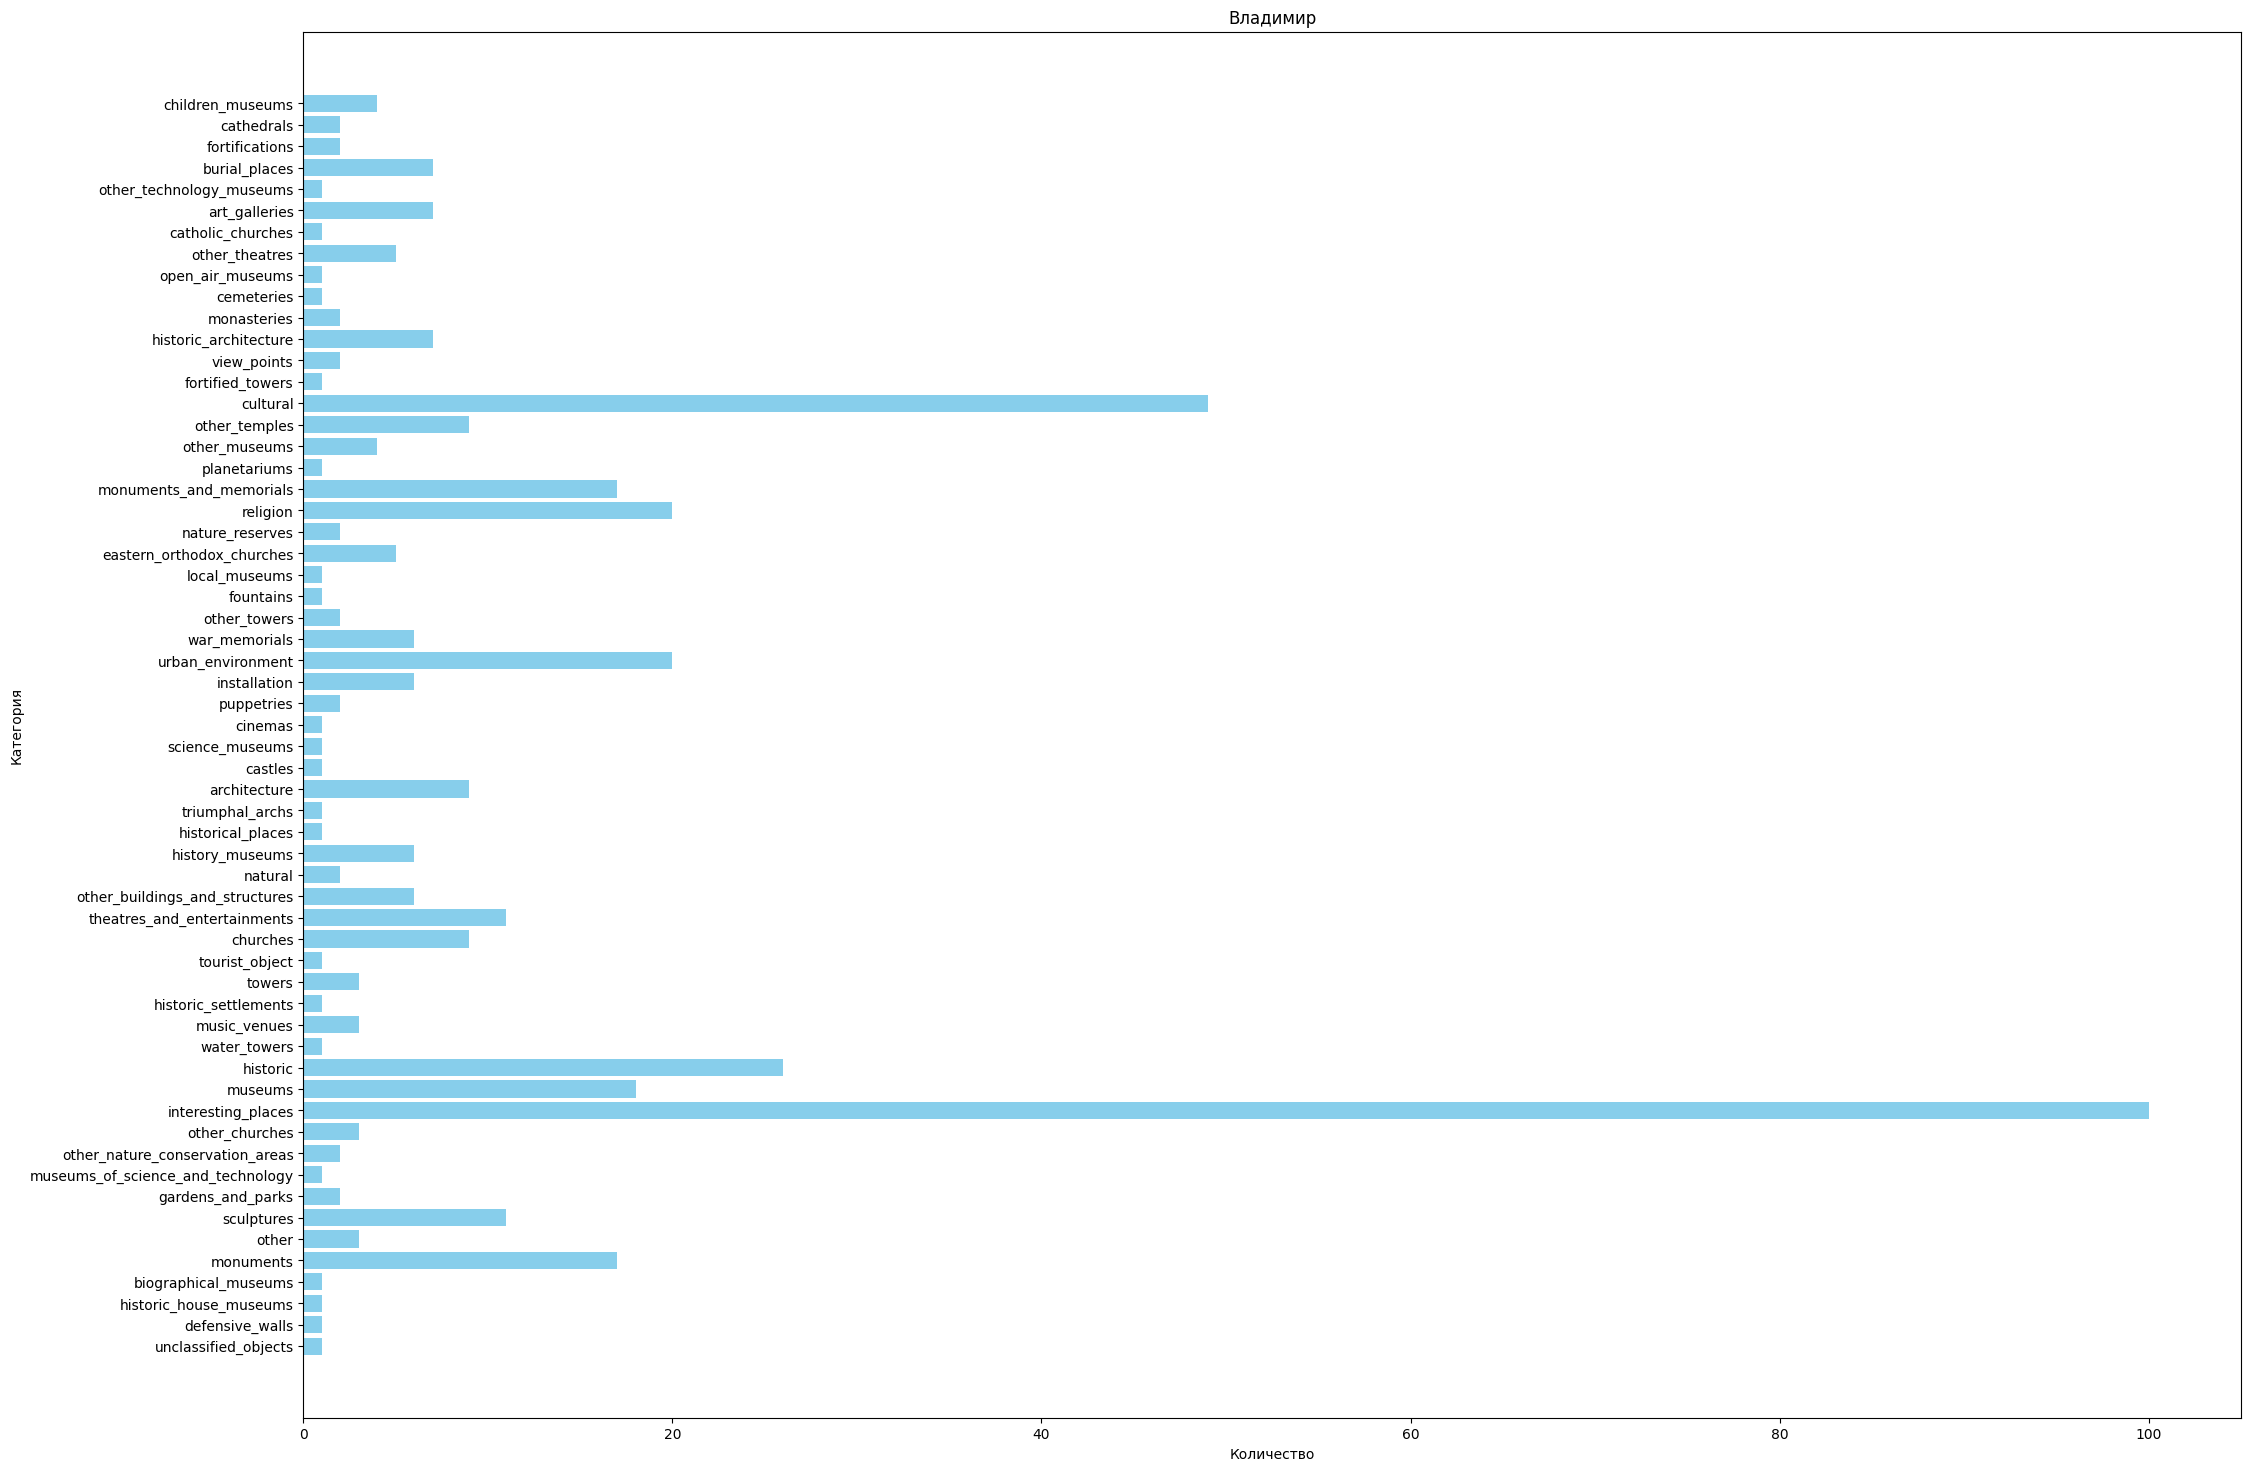

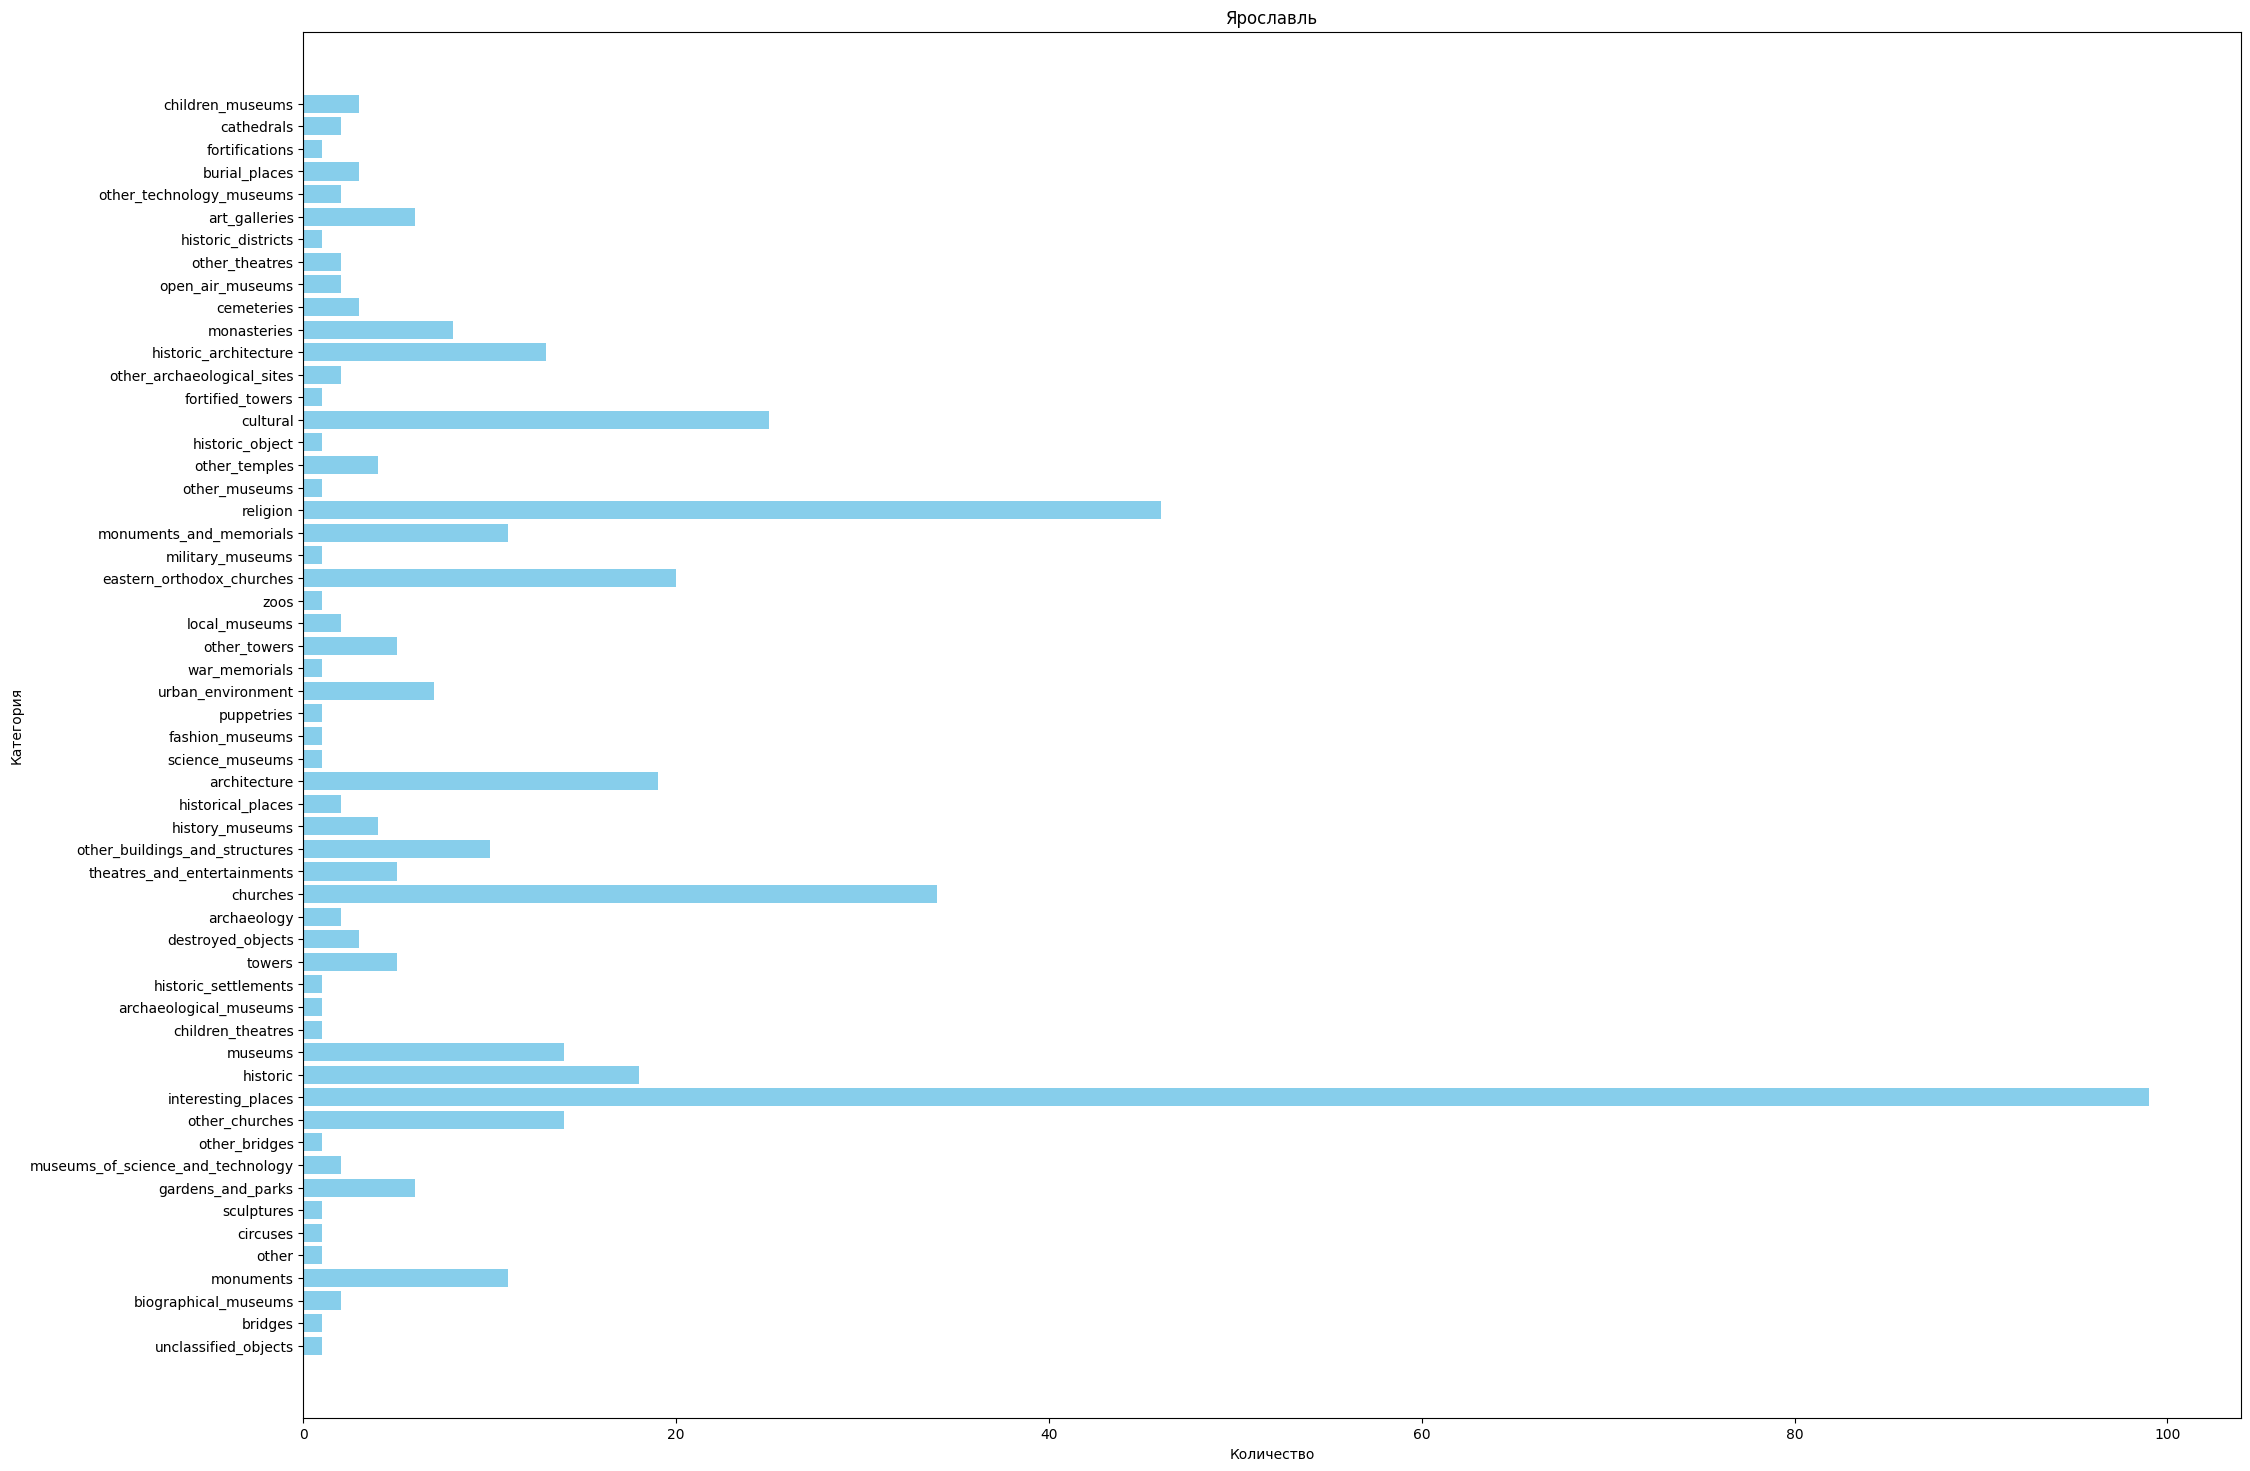

In [4]:
import matplotlib.pyplot as plt

for city in count_cat:
    # Создание диаграммы
    plt.figure(figsize=(25, 18))
    plt.barh(list(city[1].keys()), list(city[1].values()), color='skyblue')
    plt.xlabel('Количество')
    plt.ylabel('Категория')
    plt.title(city[0])
    plt.savefig(city[0] + '.png')

In [5]:
places_nn = pd.read_csv('datas/NN_images.csv')
places_ekb = pd.read_csv('datas/EKB_images.csv')
places_vlad = pd.read_csv('datas/Vladimir_images.csv')
places_yarik = pd.read_csv('datas/yaroslavl_photo.csv')


In [6]:
import io
import base64
def decode(image_code):
        image = np.array(Image.open(io.BytesIO(base64.b64decode(image_code))).convert("RGB")).astype(np.float32)
        img = Image.fromarray(image.astype('uint8'))
        return img

In [7]:
from PIL import Image
import os
print(places_ekb['name'][0])
all_places = [['Нижний Новгород2', places_nn], ['Екатеринбург2', places_ekb], ['Владимир2', places_vlad], ['Ярослав2', places_yarik]]

#for place in all_places:
#    place[1] = place[1].drop_duplicates(subset=place[1].columns[1], ignore_index=True)

for city in all_places:
    os.makedirs(os.path.join('datas', city[0]), exist_ok=True)
    save_folder = os.path.join('datas', city[0])
    for count in range(len(city[1])):
        img = decode(city[1][city[1].columns[1]][count])
        img.save(os.path.join(save_folder, str(len(os.listdir(save_folder))).zfill(5) + '_' + city[1]['name'][count].replace('"','') + '.jpg'))

Динамо


In [8]:
for city in all_places:
    imgs = list(city[1][city[1].columns[1]])
    print('\n', city[0])
    print(len(imgs))
    print(len(set(imgs)))
            


 Нижний Новгород2
3468
3038

 Екатеринбург2
3278
2969

 Владимир2
3498
3316

 Ярослав2
4372
3963


In [9]:
places_nn = pd.read_csv('datas/NN_images.csv')
print(len(places_nn['image']))
print(len(set(places_nn['image'])))

places_nn = places_nn.drop_duplicates(subset='image')
print(len(places_nn['image']))
print(len(set(places_nn['image'])))

3468
3038
3038
3038
